<div align="center">

# MEGR7172/8172

### Computational Methods (Fall 2025)
### Duke 227, Tu/Th 08:30 - 09:45 pm

</div>





## 18 Poisson/Laplace equation

So far we've focused on the **heat equation** (parabolic PDE). Let's explore other fundamental PDE types.

### Mathematical Classification of Second-Order PDEs

This classification applies mainly to second-order PDEs of the general form:

$$
A u_{xx} + 2B u_{xy} + C u_{yy} + D u_x + E u_y + F u + G = 0
$$

The **discriminant** $\Delta = B^2 - AC$ determines the PDE type:
- **Elliptic**: $\Delta < 0$ (e.g., $A = C = 1, B = 0$)
- **Parabolic**: $\Delta = 0$ (e.g., $A = 0, C = 1$)
- **Hyperbolic**: $\Delta > 0$ (e.g., $A = 1, C = -1/c^2, B = 0$)

### Three Main Categories:

#### 1. **Parabolic PDEs** (Heat/Diffusion equation):
$$\frac{\partial u}{\partial t} = \alpha \nabla^2 u$$

**Properties:**
- **First-order in time**, second-order in space
- **Discriminant**: $\Delta = 0$
- **Characteristic curves**: One family of real characteristics
- **Time-dependent evolution** from initial conditions (e.g., diffusion like)


#### 2. **Elliptic PDEs** (Poisson/Laplace equation):
$$\nabla^2 u = f(x,y) \quad \text{(Poisson)}$$
$$\nabla^2 u = 0 \quad \text{(Laplace)}$$

**Properties:**
- **No time dependence** - steady-state problems
- **Discriminant**: $\Delta < 0$
- **Boundary value problems** - solution determined by boundary conditions
- **Steady-state solutions** - equilibrium configurations
- **Maximum/minimum principle** - extrema occur on boundaries
- **Electrostatic potential**: $\nabla^2 \phi = -\rho/\epsilon_0$
- **Gravitational potential**: $\nabla^2 \phi = 4\pi G \rho$
- **Steady-state heat conduction**: $\nabla^2 T = -q/k$
- **Membrane deflection under load**

#### 3. **Hyperbolic PDEs** (Wave equation):
$$\frac{\partial^2 u}{\partial t^2} = c^2 \nabla^2 u$$

**Properties:**
- **Discriminant**: $\Delta > 0$
- **Time-dependent with second time derivative**
- **Conservative** - energy preserved (no dissipation)
- **Acoustic waves**: $\frac{\partial^2 p}{\partial t^2} = c^2 \nabla^2 p$
- **Electromagnetic waves**: $\frac{\partial^2 \mathbf{E}}{\partial t^2} = c^2 \nabla^2 \mathbf{E}$
- **Elastic waves in solids**
- **Water waves**

### Characteristic Theory and Physical Significance

**Characteristics** are curves along which information propagates in a PDE. They determine:
- **Domain of dependence**: Which initial/boundary data affects the solution at a given point
- **Numerical method design**: How to discretize the PDE stably
- **Physical interpretation**: How disturbances propagate in the system

#### Characteristic Analysis:

For the general second-order PDE $A u_{xx} + 2B u_{xy} + C u_{yy} + \ldots = 0$:

**Characteristic equation**: $A (dy)^2 - 2B \, dx \, dy + C (dx)^2 = 0$

**Solutions**:
- **Elliptic** ($\Delta < 0$): No real characteristics → global coupling
- **Parabolic** ($\Delta = 0$): One characteristic direction → one-way information flow  
- **Hyperbolic** ($\Delta > 0$): Two characteristic directions → finite propagation speed

#### Engineering Implications:

**Design considerations**:
- **Elliptic**: Optimize entire domain simultaneously (structural optimization)
- **Parabolic**: Control evolution process (temperature control, chemical reactors)
- **Hyperbolic**: Manage wave propagation (vibration control, acoustics)

**Computational strategies**:
- **Elliptic**: Iterative solvers, multigrid methods
- **Parabolic**: Time-stepping schemes, implicit methods for stability
- **Hyperbolic**: Explicit schemes, upwind methods, CFL constraints

## 18.1 Poisson Equation (Elliptic PDE)

The **Poisson equation** is a fundamental elliptic PDE:
$$\nabla^2 u = f(x,y)$$

In 2D: $$\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = f(x,y)$$

**Key characteristics:**
- **No time dependence** - steady-state problem
- **Boundary value problem** - need conditions on domain boundary
- **Global coupling** - solution at each point depends on entire domain

**Physical interpretation:**
- **f(x,y) > 0**: Heat sources (e.g., resistive heating)
- **f(x,y) < 0**: Heat sinks (e.g., cooling)
- **f(x,y) = 0**: Laplace equation (equilibrium with no sources)

**Boundary conditions:**
- **Dirichlet**: $u = g(x,y)$ on boundary (fixed temperature)
- **Neumann**: $\frac{\partial u}{\partial n} = h(x,y)$ on boundary (heat flux)
- **Mixed**: Combination of both types

**Finite difference discretization:**
$$\frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{(\Delta x)^2} + \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{(\Delta y)^2} = f_{i,j}$$

For square grids ($\Delta x = \Delta y = h$):
$$u_{i+1,j} + u_{i-1,j} + u_{i,j+1} + u_{i,j-1} - 4u_{i,j} = h^2 f_{i,j}$$



## 18.2 Solving the Poisson Equation

The discretized Poisson equation creates a **large sparse linear system**:
$$\mathbf{A}\mathbf{u} = \mathbf{b}$$

where:
- $\mathbf{A}$ is the discrete Laplacian operator (sparse matrix)
- $\mathbf{u}$ is the unknown solution vector
- $\mathbf{b}$ contains the source terms $f_{i,j}$ and boundary conditions

**Matrix structure:**
- **5-point stencil** in 2D creates pentadiagonal structure
- **Sparse matrix** - only ~5 non-zeros per row
- **Symmetric positive definite** for Dirichlet problems

**Solution methods:**

1. **Direct methods:**
   - LU decomposition
   - Efficient for small to medium problems
   - $O(N^3)$ complexity can be prohibitive for large N

2. **Iterative methods:**

### Jacobi Iteration

The **Jacobi method** is the simplest iterative solver. For the 5-point stencil:
$$u_{i+1,j} + u_{i-1,j} + u_{i,j+1} + u_{i,j-1} - 4u_{i,j} = h^2 f_{i,j}$$

**Algorithm:**
1. Start with initial guess $u^{(0)}$
2. For each iteration $k$, update simultaneously:
   $$u_{i,j}^{(k+1)} = \frac{1}{4}\left(u_{i+1,j}^{(k)} + u_{i-1,j}^{(k)} + u_{i,j+1}^{(k)} + u_{i,j-1}^{(k)} - h^2 f_{i,j}\right)$$

**Key characteristics:**
- **Simultaneous updates**: All new values computed using only old values
- **Parallel-friendly**: Each grid point updated independently
- **Memory requirements**: Need to store both old and new arrays
- **Convergence rate**: Slower than Gauss-Seidel, $O(h^{-2})$ iterations

### Gauss-Seidel Iteration

The **Gauss-Seidel method** improves upon Jacobi by using updated values immediately:

**Algorithm:**
1. Start with initial guess $u^{(0)}$
2. For each iteration, update in-place (e.g., left-to-right, bottom-to-top):
   $$u_{i,j}^{(k+1)} = \frac{1}{4}\left(u_{i+1,j}^{(k)} + u_{i-1,j}^{(k+1)} + u_{i,j+1}^{(k)} + u_{i,j-1}^{(k+1)} - h^2 f_{i,j}\right)$$

**Key characteristics:**
- **Sequential updates**: Uses most recent values available
- **Memory efficient**: Only one array needed (in-place updates)
- **Faster convergence**: Typically ~2× faster than Jacobi
- **Order dependent**: Convergence rate depends on update ordering

### Successive Over-Relaxation (SOR)

An enhancement to Gauss-Seidel using a relaxation parameter $\omega$:
$$u_{i,j}^{(k+1)} = (1-\omega)u_{i,j}^{(k)} + \omega \cdot \frac{1}{4}\left(u_{i+1,j}^{(k)} + u_{i-1,j}^{(k+1)} + u_{i,j+1}^{(k)} + u_{i,j-1}^{(k+1)} - h^2 f_{i,j}\right)$$

- **$\omega = 1$**: Standard Gauss-Seidel
- **$1 < \omega < 2$**: Over-relaxation (faster convergence)
- **$0 < \omega < 1$**: Under-relaxation (more stable)
- **Optimal $\omega$**: Can reduce iterations by factor of 3-5

### Convergence Comparison

For a $N \times N$ grid with spacing $h = 1/N$:

| Method | Iterations to Convergence | Computational Cost | Memory |
|--------|---------------------------|-------------------|---------|
| **Jacobi** | $O(N^2) = O(h^{-2})$ | $O(N^4)$ | $2N^2$ |
| **Gauss-Seidel** | $O(N^2) = O(h^{-2})$ | $O(N^4)$ | $N^2$ |
| **Optimal SOR** | $O(N) = O(h^{-1})$ | $O(N^3)$ | $N^2$ |

**Convergence:** Elliptic problems generally have well-conditioned systems and good convergence properties, especially with proper preconditioning.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve
from mpl_toolkits.mplot3d import Axes3D

def solve_poisson_2d(Lx, Ly, Nx, Ny, f_func, bc_func=None):
    """
    Solve 2D Poisson equation: ∇²u = f(x,y)
    with Dirichlet boundary conditions
    """
    # Grid setup
    dx = Lx / Nx
    dy = Ly / Ny
    x = np.linspace(0, Lx, Nx + 1)
    y = np.linspace(0, Ly, Ny + 1)
    X, Y = np.meshgrid(x, y)
    
    # Interior points
    N_interior = (Nx - 1) * (Ny - 1)
    
    # Build the system matrix A and right-hand side b
    rows, cols, data = [], [], []
    b = np.zeros(N_interior)
    
    for j in range(1, Ny):  # y interior points
        for i in range(1, Nx):  # x interior points
            idx = (j-1) * (Nx-1) + (i-1)  # Linear index
            
            # Main diagonal: -4
            rows.append(idx)
            cols.append(idx)
            data.append(-4.0)
            
            # Right-hand side: source term
            b[idx] = dx*dy * f_func(x[i], y[j])
            
            # x-direction neighbors
            if i > 1:  # left neighbor exists
                rows.append(idx)
                cols.append(idx - 1)
                data.append(1.0)
            else:  # left boundary
                if bc_func:
                    b[idx] -= bc_func(x[0], y[j])  # Dirichlet BC
                
            if i < Nx-1:  # right neighbor exists
                rows.append(idx)
                cols.append(idx + 1)
                data.append(1.0)
            else:  # right boundary
                if bc_func:
                    b[idx] -= bc_func(x[Nx], y[j])  # Dirichlet BC
            
            # y-direction neighbors
            if j > 1:  # bottom neighbor exists
                rows.append(idx)
                cols.append(idx - (Nx-1))
                data.append(1.0)
            else:  # bottom boundary
                if bc_func:
                    b[idx] -= bc_func(x[i], y[0])  # Dirichlet BC
                
            if j < Ny-1:  # top neighbor exists
                rows.append(idx)
                cols.append(idx + (Nx-1))
                data.append(1.0)
            else:  # top boundary
                if bc_func:
                    b[idx] -= bc_func(x[i], y[Ny])  # Dirichlet BC
    
    # Create sparse matrix and solve
    A = csr_matrix((data, (rows, cols)), shape=(N_interior, N_interior))
    u_interior = spsolve(A, b)
    
    # Reconstruct full solution including boundaries
    u = np.zeros((Ny+1, Nx+1))
    
    # Interior points
    for j in range(1, Ny):
        for i in range(1, Nx):
            idx = (j-1) * (Nx-1) + (i-1)
            u[j, i] = u_interior[idx]
    
    # Boundary conditions
    if bc_func:
        # Set boundary values
        u[0, :] = [bc_func(x[i], y[0]) for i in range(Nx+1)]      # bottom
        u[Ny, :] = [bc_func(x[i], y[Ny]) for i in range(Nx+1)]   # top
        u[:, 0] = [bc_func(x[0], y[j]) for j in range(Ny+1)]     # left
        u[:, Nx] = [bc_func(x[Nx], y[j]) for j in range(Ny+1)]   # right
    
    return X, Y, u



Example 1: Poisson Equation with Heat Sources


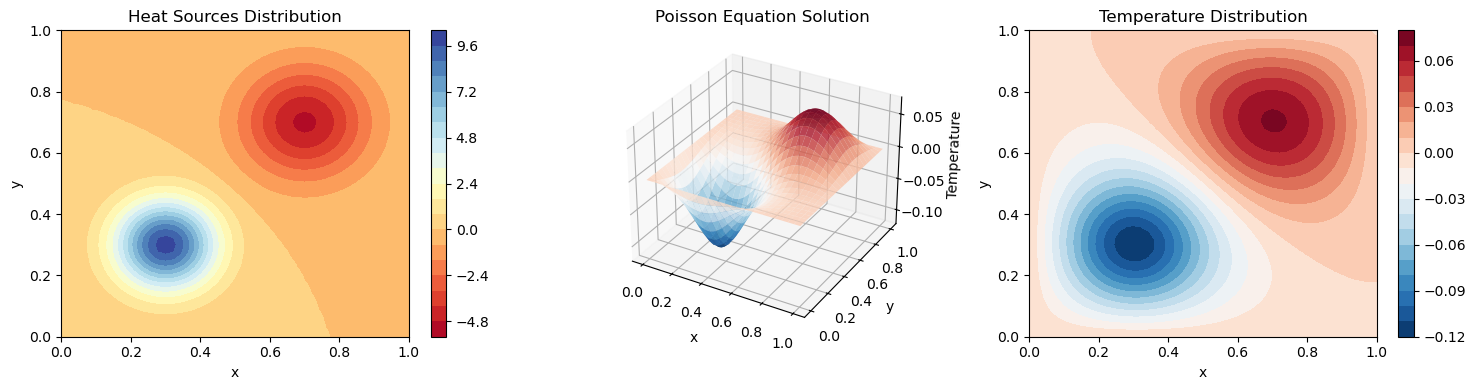

Temperature range: -0.119 to 0.072


In [2]:
# Example 1: Poisson Equation - Heat source problem
print("Example 1: Poisson Equation with Heat Sources")

# Parameters
Lx = Ly = 1.0
Nx = Ny = 50

# Heat source function: multiple Gaussian sources
def heat_sources(x, y):
    source1 = 10 * np.exp(-50 * ((x - 0.3)**2 + (y - 0.3)**2))  # Hot spot
    source2 = -5 * np.exp(-30 * ((x - 0.7)**2 + (y - 0.7)**2))  # Cold spot
    return source1 + source2

# Boundary condition function: temperature = 0 on boundaries
def boundary_temp(x, y):
    return 0.0

# Solve Poisson equation
X_poisson, Y_poisson, u_poisson = solve_poisson_2d(Lx, Ly, Nx, Ny, heat_sources, boundary_temp)

# Plot Poisson equation results
fig = plt.figure(figsize=(15, 4))

# Heat source visualization (first plot)
ax1 = fig.add_subplot(131)
source_map = np.zeros_like(X_poisson)
for i in range(len(X_poisson[0])):
    for j in range(len(Y_poisson)):
        source_map[j, i] = heat_sources(X_poisson[j, i], Y_poisson[j, i])

contour1 = ax1.contourf(X_poisson, Y_poisson, source_map, levels=20, cmap='RdYlBu')
ax1.set_title('Heat Sources Distribution')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.colorbar(contour1, ax=ax1)

# 3D surface plot (second plot)
ax2 = fig.add_subplot(132, projection='3d')
surf2 = ax2.plot_surface(X_poisson, Y_poisson, u_poisson, cmap='RdBu_r', alpha=0.8)
ax2.set_title('Poisson Equation Solution')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('Temperature')

# Contour plot (third plot)
ax3 = fig.add_subplot(133)
contour3 = ax3.contourf(X_poisson, Y_poisson, u_poisson, levels=20, cmap='RdBu_r')
ax3.set_title('Temperature Distribution')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
plt.colorbar(contour3, ax=ax3)
plt.tight_layout()
plt.show()

print(f"Temperature range: {np.min(u_poisson):.3f} to {np.max(u_poisson):.3f}")

### Analysis of Poisson Equation Results

In the above example, we placed two **Gaussian sources**: 
- one **positive source** at (0.3, 0.3), with magnitude 10 and decay rate 50
- one **negative source** at (0.7, 0.7), with magnitude 5 and decay rate 30

The corresponding Poisson equation is:
$$\nabla^2 u = 10 e^{-50[(x-0.3)^2 + (y-0.3)^2]} - 5 e^{-30[(x-0.7)^2 + (y-0.7)^2]}$$

The steady-state temperature distribution $u(x,y)$ shows:

- **Peak at (0.3, 0.3)**: Corresponds to the positive heat source (hot spot)
- **Depression at (0.7, 0.7)**: Corresponds to the negative heat source (cold spot)  
- **Smooth variation**: Temperature changes smoothly due to heat conduction, creating non-radial temperature patterns


In [30]:
def solve_laplace_2d_iterative(Lx, Ly, Nx, Ny, bc_func, method='gauss_seidel', max_iter=1000, tol=1e-6):
    """
    Solve 2D Laplace equation: ∇²u = 0
    using iterative methods (Jacobi or Gauss-Seidel)
    """
    # Grid setup
    x = np.linspace(0, Lx, Nx + 1)
    y = np.linspace(0, Ly, Ny + 1)
    X, Y = np.meshgrid(x, y)
    
    # Initialize solution
    u = np.zeros((Ny+1, Nx+1))
    
    # Set boundary conditions
    u[0, :] = [bc_func(x[i], y[0]) for i in range(Nx+1)]      # bottom
    u[Ny, :] = [bc_func(x[i], y[Ny]) for i in range(Nx+1)]   # top
    u[:, 0] = [bc_func(x[0], y[j]) for j in range(Ny+1)]     # left
    u[:, Nx] = [bc_func(x[Nx], y[j]) for j in range(Ny+1)]   # right
    
    # Iterative solution
    for iteration in range(max_iter):
        u_old = u.copy()
        
        max_change = 0.0
        for j in range(1, Ny):
            for i in range(1, Nx):
                old_value = u[j, i]
                
                if method == 'jacobi':
                    u_new = 0.25 * (u_old[j, i-1] + u_old[j, i+1] + 
                                   u_old[j-1, i] + u_old[j+1, i])
                    u[j, i] = u_new
                else:  # Gauss-Seidel - use most recent values
                    u[j, i] = 0.25 * (u[j, i-1] + u[j, i+1] + 
                                     u[j-1, i] + u[j+1, i])
                
                # Track maximum change for convergence
                change = abs(u[j, i] - old_value)
                max_change = max(max_change, change)

        # Print progress every 100 iterations
        if (iteration + 1) % 500 == 0:
            print(f"{method}-Iteration {iteration+1}: max change = {max_change:.2e}")

        # Check convergence based on maximum change
        if max_change < tol:
            print(f"{method.replace('_', '-').title()} converged in {iteration+1} iterations")
            print(f"Final residual: {max_change:.2e}")
            break
    else:
        print(f"{method.replace('_', '-').title()} did not converge in {max_iter} iterations")
        print(f"Final residual: {max_change:.2e}")
    
    return X, Y, u, iteration+1



Comparing iterative methods:

JACOBI METHOD:
jacobi-Iteration 500: max change = 2.23e-04
jacobi-Iteration 1000: max change = 4.49e-05
Jacobi converged in 1487 iterations
Final residual: 9.98e-06

GAUSS-SEIDEL METHOD:
gauss_seidel-Iteration 500: max change = 9.55e-05
Gauss-Seidel converged in 866 iterations
Final residual: 9.97e-06


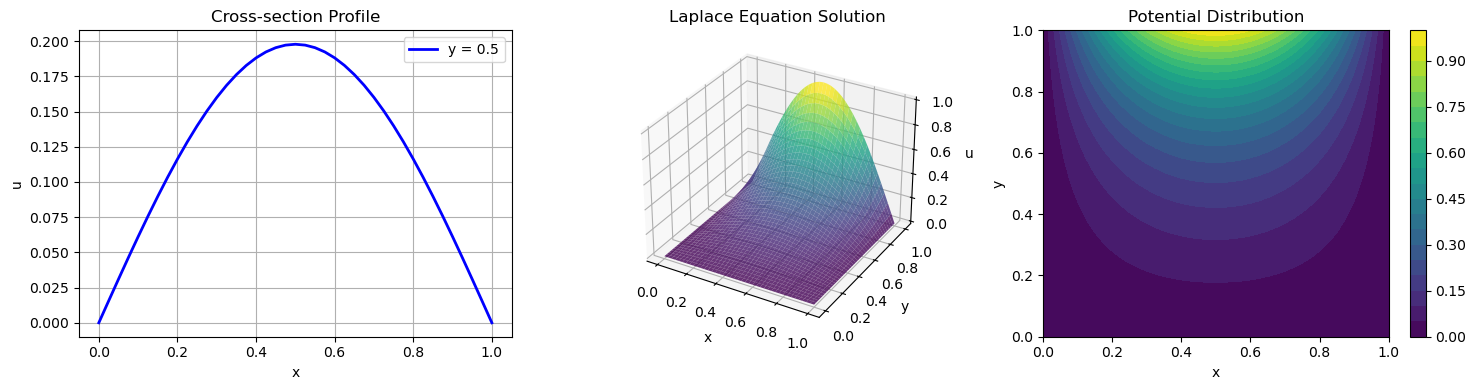


ITERATIVE METHOD COMPARISON:
Jacobi:       Converged in 1487 iterations
Gauss-Seidel: Converged in  866 iterations
Speedup:      1.7x faster with Gauss-Seidel
Solution range: 0.000 to 1.000


In [31]:
# Example 2: Laplace Equation - Boundary value problem

# Boundary condition function for Laplace equation
def boundary_func_laplace(x, y):
    if abs(y - 1.0) < 1e-10:  # top boundary (Ly = 1.0)
        return np.sin(np.pi * x)
    else:
        return 0.0

# Parameters for Laplace equation
Lx = Ly = 1.0
Nx = Ny = 40

print("\nComparing iterative methods:")

# Solve using Jacobi iteration
print("\n" + "="*50)
print("JACOBI METHOD:")
print("="*50)
X_jacobi, Y_jacobi, u_jacobi, iter_jacobi = solve_laplace_2d_iterative(
    Lx, Ly, Nx, Ny, boundary_func_laplace, method='jacobi', max_iter=2000, tol=1e-5)

# Solve using Gauss-Seidel iteration  
print("\n" + "="*50)
print("GAUSS-SEIDEL METHOD:")
print("="*50)
X_iter, Y_iter, u_iter, iterations = solve_laplace_2d_iterative(
    Lx, Ly, Nx, Ny, boundary_func_laplace, method='gauss_seidel', max_iter=1000, tol=1e-5)

# Plot Laplace equation results
fig = plt.figure(figsize=(15, 4))

# Cross-section at y = 0.5 (first plot)
ax1 = fig.add_subplot(131)
mid_idx = Ny // 2
ax1.plot(X_iter[mid_idx, :], u_iter[mid_idx, :], 'b-', linewidth=2, label='y = 0.5')
ax1.set_title('Cross-section Profile')
ax1.set_xlabel('x')
ax1.set_ylabel('u')
ax1.grid(True)
ax1.legend()

# 3D surface plot (second plot)
ax2 = fig.add_subplot(132, projection='3d')
surf2 = ax2.plot_surface(X_iter, Y_iter, u_iter, cmap='viridis', alpha=0.8)
ax2.set_title('Laplace Equation Solution')
ax2.set_xlabel('x'); ax2.set_ylabel('y'); ax2.set_zlabel('u')

# Contour plot (third plot)
ax3 = fig.add_subplot(133)
contour3 = ax3.contourf(X_iter, Y_iter, u_iter, levels=20, cmap='viridis')
ax3.set_title('Potential Distribution')
ax3.set_xlabel('x'); ax3.set_ylabel('y')
plt.colorbar(contour3, ax=ax3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("ITERATIVE METHOD COMPARISON:")
print("="*60)
print(f"Jacobi:       Converged in {iter_jacobi:4d} iterations")
print(f"Gauss-Seidel: Converged in {iterations:4d} iterations")
print(f"Speedup:      {iter_jacobi/iterations:.1f}x faster with Gauss-Seidel")
print(f"Solution range: {np.min(u_iter):.3f} to {np.max(u_iter):.3f}")
print("="*60)

### Analysis of Laplace Equation Results

In this example, we solved the **Laplace equation** $\nabla^2 u = 0$ with boundary conditions:
- **Top boundary**: $u = \sin(\pi x)$ (sinusoidal temperature profile)
- **Other boundaries**: $u = 0$ (zero temperature)

The corresponding equation is:
$$\nabla^2 u = 0 \quad \text{with} \quad u|_{y=1} = \sin(\pi x), \quad u|_{\text{other}} = 0$$

The steady-state solution demonstrates:

- **Exponential decay**: Temperature decreases exponentially from the top boundary downward
- **Sinusoidal profile**: Maintains the $\sin(\pi x)$ shape but with decreasing amplitude
- **No sources**: Solution is purely determined by boundary conditions (no internal heat generation)
- **Harmonic function**: Satisfies maximum principle - extrema occur only at boundaries

**Iterative method comparison:**
- **Gauss-Seidel**: Faster convergence (~half the iterations of Jacobi)
- **Jacobi**: More parallel-friendly but slower convergence